<a href="https://colab.research.google.com/github/sankaroffzl/stock-price-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scikit-learn matplotlib numpy pandas --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download stock data
ticker = "JAYNECOIND.NS"  # Change to any stock symbol
df = yf.download(ticker, start="2020-01-01", end=None, auto_adjust=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     JAYNECOIND.NS JAYNECOIND.NS JAYNECOIND.NS JAYNECOIND.NS   
Date                                                                 
2020-01-01          3.20          3.25          3.00          3.00   
2020-01-02          3.50          3.50          3.10          3.20   
2020-01-03          3.55          3.75          3.25          3.45   
2020-01-06          3.45          3.65          3.40          3.60   
2020-01-07          3.75          3.75          3.60          3.65   

Price             Volume  
Ticker     JAYNECOIND.NS  
Date                      
2020-01-01         35894  
2020-01-02        101793  
2020-01-03         99404  
2020-01-06         27771  
2020-01-07         31351  


In [ ]:
# Basic features
df["Return_1d"] = df["Close"].pct_change()
df["Lag_1"] = df["Close"].shift(1)
df["Lag_5"] = df["Close"].shift(5)
df["SMA_5"] = df["Close"].rolling(5).mean()
df["SMA_20"] = df["Close"].rolling(20).mean()

# Target = next day's close
df["Target"] = df["Close"].shift(-1)

# Drop missing values
df = df.dropna()
print(df.tail())

Price              Close          High           Low          Open  \
Ticker     JAYNECOIND.NS JAYNECOIND.NS JAYNECOIND.NS JAYNECOIND.NS   
Date                                                                 
2025-08-18     57.540001     59.299999     57.169998     58.099998   
2025-08-19     63.290001     63.290001     57.340000     58.040001   
2025-08-20     63.389999     65.500000     61.500000     63.549999   
2025-08-21     62.529999     63.700001     61.860001     63.700001   
2025-08-22     60.799999     64.660004     60.500000     63.000000   

Price             Volume Return_1d      Lag_1      Lag_5      SMA_5   SMA_20  \
Ticker     JAYNECOIND.NS                                                       
Date                                                                           
2025-08-18      20860641  0.001741  57.439999  53.389999  57.476000  50.0735   
2025-08-19      47529148  0.099930  57.540001  54.049999  59.324001  51.3570   
2025-08-20      66121093  0.001580  63.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = ["Return_1d", "Lag_1", "Lag_5", "SMA_5", "SMA_20"]
X = df[features]
y = df["Target"]

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 1.72


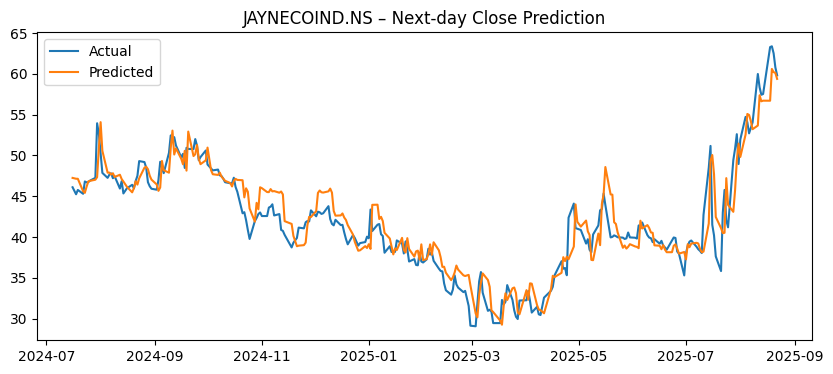

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, pred, label="Predicted")
plt.legend()
plt.title(f"{ticker} – Next-day Close Prediction")
plt.show()

In [ ]:
latest = X.tail(1)
prediction = model.predict(latest)[0]

last_close = float(df['Close'].iloc[-1])  # Convert to float
print(f"Last close: {last_close:.2f}")
print(f"Predicted next close: {prediction:.2f}")

Last close: 60.80
Predicted next close: 59.39


/tmp/ipython-input-4261715909.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_close = float(df['Close'].iloc[-1])  # Convert to float
